In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# read files
df = pd.read_csv('norm_selected_pixels.csv')

In [3]:
df.head()

,px_1456,px_1408,px_1504,px_1503,px_1455,px_1551,px_1552,px_1361,px_1360,px_1409,...,px_82,px_12,px_14,px_29,px_1217,px_1612,px_36,px_28,px_83,emotion
0,0.654902,0.674510,0.639216,0.635294,0.654902,0.627451,0.619608,0.698039,0.701961,0.662745,...,0.654902,0.349020,0.474510,0.670588,0.705882,0.713725,0.443137,0.619608,0.454902,0
1,0.360784,0.388235,0.349020,0.337255,0.439216,0.243137,0.384314,0.376471,0.364706,0.450980,...,0.533333,0.600000,0.678431,0.631373,0.474510,0.654902,0.631373,0.650980,0.423529,0
2,0.650980,0.772549,0.670588,0.556863,0.611765,0.772549,0.764706,0.654902,0.800000,0.533333,...,0.792157,0.152941,0.541176,0.862745,0.980392,0.788235,0.635294,0.850980,0.682353,2
3,0.482353,0.486275,0.529412,0.584314,0.643137,0.592157,0.588235,0.513725,0.435294,0.529412,...,0.384314,0.125490,0.082353,0.435294,0.529412,0.482353,0.752941,0.384314,0.505882,4
4,0.580392,0.552941,0.603922,0.580392,0.588235,0.556863,0.600000,0.501961,0.552941,0.486275,...,0.662745,0.011765,0.090196,0.596078,0.533333,0.811765,0.325490,0.600000,0.576471,6


In [4]:
y = df.emotion
X = df.drop('emotion',axis=1)

In [5]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=df['emotion'], random_state=88)

In [6]:
X_train.head()

,px_1456,px_1408,px_1504,px_1503,px_1455,px_1551,px_1552,px_1361,px_1360,px_1409,...,px_1746,px_82,px_12,px_14,px_29,px_1217,px_1612,px_36,px_28,px_83
17374,0.815686,0.784314,0.564706,0.576471,0.823529,0.729412,0.780392,0.784314,0.776471,0.792157,...,0.882353,0.176471,0.105882,0.121569,0.309804,0.678431,0.741176,0.274510,0.219608,0.262745
20895,0.615686,0.647059,0.568627,0.517647,0.556863,0.494118,0.529412,0.701961,0.666667,0.701961,...,0.454902,0.141176,0.121569,0.207843,0.145098,0.654902,0.745098,0.101961,0.141176,0.121569
7762,0.470588,0.505882,0.392157,0.329412,0.403922,0.298039,0.192157,0.537255,0.498039,0.501961,...,0.282353,0.670588,0.780392,0.745098,0.670588,0.654902,0.168627,0.686275,0.658824,0.690196
18388,0.780392,0.784314,0.772549,0.768627,0.780392,0.756863,0.772549,0.764706,0.788235,0.756863,...,0.658824,0.713725,0.678431,0.713725,0.788235,0.792157,0.749020,0.588235,0.800000,0.682353
10101,0.713725,0.737255,0.682353,0.662745,0.709804,0.623529,0.643137,0.745098,0.737255,0.733333,...,0.443137,0.658824,0.521569,0.607843,0.729412,0.764706,0.576471,0.596078,0.745098,0.627451


In [7]:
X_test.head()

,px_1456,px_1408,px_1504,px_1503,px_1455,px_1551,px_1552,px_1361,px_1360,px_1409,...,px_1746,px_82,px_12,px_14,px_29,px_1217,px_1612,px_36,px_28,px_83
9780,0.125490,0.490196,0.113725,0.149020,0.117647,0.780392,0.666667,0.721569,0.752941,0.643137,...,0.211765,0.639216,0.737255,0.764706,0.745098,0.270588,0.921569,0.678431,0.721569,0.647059
7860,0.847059,0.870588,0.831373,0.835294,0.858824,0.819608,0.819608,0.866667,0.878431,0.858824,...,0.815686,0.576471,0.670588,0.686275,0.654902,0.866667,0.466667,0.447059,0.670588,0.533333
25340,0.172549,0.258824,0.250980,0.219608,0.152941,0.250980,0.258824,0.356863,0.349020,0.325490,...,0.290196,0.109804,0.086275,0.090196,0.117647,0.262745,0.282353,0.101961,0.101961,0.113725
5006,0.368627,0.384314,0.317647,0.337255,0.298039,0.317647,0.211765,0.333333,0.258824,0.372549,...,0.070588,0.305882,0.000000,0.172549,0.176471,0.533333,0.235294,0.247059,0.121569,0.294118
23588,0.392157,0.505882,0.454902,0.388235,0.474510,0.380392,0.454902,0.529412,0.639216,0.364706,...,0.552941,0.290196,0.329412,0.443137,0.517647,0.603922,0.678431,0.094118,0.533333,0.188235


In [8]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(25120, 149) (25120,) (10767, 149) (10767,)


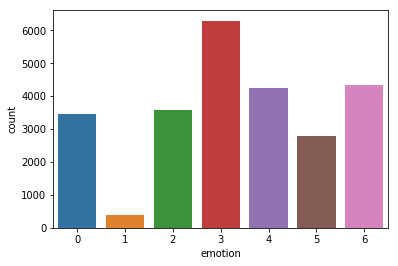

In [9]:
sns.countplot(y_train)
plt.show()

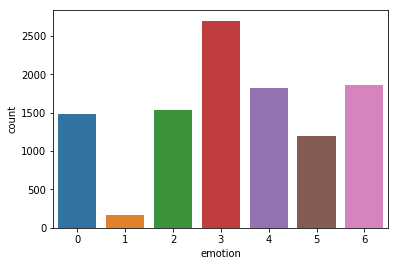

In [10]:
sns.countplot(y_test)
plt.show()

## Build Decision Tree model

In [27]:
# decision tree model
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
y_pred = dt.predict(X_test)
print(y_pred)

[6 5 0 ... 3 6 6]


In [29]:
# accuracy
scores = dt.score(X_test,y_test)
print('accuracy:',scores)

accuracy: 0.28160118881768365


In [30]:
# confusion matrix
confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

array([[327,  19, 206, 328, 238, 122, 246],
       [ 19,  46,  10,  33,  27,  15,  14],
       [187,  20, 384, 308, 234, 127, 276],
       [330,  46, 347, 928, 441, 230, 375],
       [253,  25, 264, 405, 430, 134, 312],
       [103,  15, 133, 171, 131, 448, 200],
       [252,  26, 265, 367, 309, 172, 469]])

Predicted,0,1,2,3,4,5,6,All
True,,,,,,,,
0,327,19,206,328,238,122,246,1486
1,19,46,10,33,27,15,14,164
2,187,20,384,308,234,127,276,1536
3,330,46,347,928,441,230,375,2697
4,253,25,264,405,430,134,312,1823
5,103,15,133,171,131,448,200,1201
6,252,26,265,367,309,172,469,1860
All,1471,197,1609,2540,1810,1248,1892,10767


In [31]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.22      0.22      0.22      1486
           1       0.23      0.28      0.25       164
           2       0.24      0.25      0.24      1536
           3       0.37      0.34      0.35      2697
           4       0.24      0.24      0.24      1823
           5       0.36      0.37      0.37      1201
           6       0.25      0.25      0.25      1860

   micro avg       0.28      0.28      0.28     10767
   macro avg       0.27      0.28      0.28     10767
weighted avg       0.28      0.28      0.28     10767

